In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('xtick', labelsize=BIGGER_SIZE)  

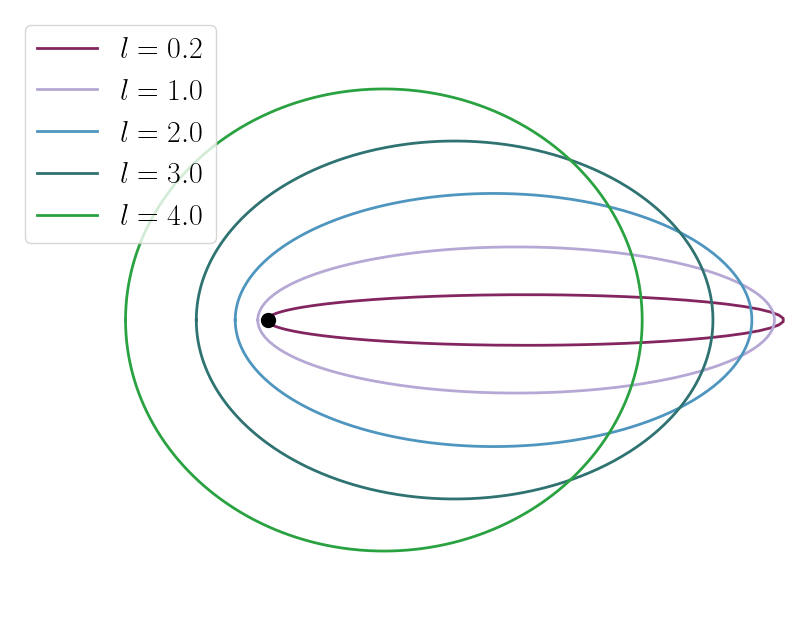

In [2]:

# Principal quantum number
n = 5

# Semi-major axis (proportional to n^2, set proportionality constant to 1 for simplicity)
a = n**2

# Values of l
l_values = np.array([0.2,1, 2, 3, 4])

# # Colors for different ellipses
# colors = ['blue', 'green', 'red', 'purple']


pastel_colors = {
    'Pastel 1': (131,38,95),
    'Pastel Pink': (182, 168, 212),
    'Pastel Blue': (78, 150, 191),
    'Pastel Green': (47, 114, 114),
    'Pastel Orange': (42, 162, 65)  # Replaced pastel yellow with pastel orange
}

# Convert RGB values to matplotlib-compatible format (0-1 range)
pastel_colors_normalized = {name: [x/255.0 for x in rgb] for name, rgb in pastel_colors.items()}
categories = list(pastel_colors.keys())
colors = [pastel_colors_normalized[name] for name in categories]



# Function to calculate the radius for given theta, a, and e
def radius(theta, a, e):
    return -1*a * (1 - e**2) / (1 + e * np.cos(theta))

# Theta values for plotting the ellipse
theta = np.linspace(0, 2 * np.pi, 1000)

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'aspect': 'equal'})

# Plot the Sommerfeld ellipses for each l
for i, l in enumerate(l_values):
    e = np.sqrt(1 - l*(l+1)/n**2)
    r = radius(theta, a, e)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    ax.plot(x, y, label=f'$l={l}$', color=colors[i], linewidth=2.0)


ax.plot(0, 0, 'ko', markersize=10)
ax.set_xlim(-a, 2*a)
ax.set_ylim(-30, 30)

ax.legend()



# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the legend
ax.legend(loc='upper left', fontsize='large')

# Save the figure as a high-resolution PDF
plt.savefig('figs/sommerfeld_ellipses.svg', format='svg')

plt.show()
